In [ ]:
import pandas as pd

Data Processing

In [ ]:
df = pd.read_csv("words.csv")
df.sample(2)

,English,Minionese
3269,thinks,nimtab
1366,owns,teg


In [ ]:
df.describe()

,English,Minionese
count,9073,9069
unique,9073,7834
top,the,mac
freq,1,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   English    9073 non-null   object
 1   Minionese  9069 non-null   object
dtypes: object(2)
memory usage: 141.9+ KB


In [ ]:
df = df.apply(lambda x: x.str.lower())
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9069 entries, 0 to 9072
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   English    9069 non-null   object
 1   Minionese  9069 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [ ]:
def generate_translation_start(row):
    sentence = f"<start> {row['Minionese']}"
    return sentence
def generate_translation_end(row):
    sentence = f"{row['Minionese']} <end>"
    return sentence

df['Translation_1'] = df.apply(generate_translation_start, axis=1)
df['Translation_2'] = df.apply(generate_translation_end, axis=1)

In [ ]:
df.sample(4)

,English,Minionese,Translation_1,Translation_2
1729,rats,moc,<start> moc,moc <end>
7475,hand-held,utanus,<start> utanus,utanus <end>
3896,messrs,oldan,<start> oldan,oldan <end>
8940,thunderstorms,muddie,<start> muddie,muddie <end>


In [ ]:
df= df.drop(columns=['Minionese'])

In [ ]:
df.sample(4)

,English,Translation_1,Translation_2
2757,vague,<start> ins,ins <end>
7893,mainstream,<start> kidmar,kidmar <end>
7955,proceeding,<start> paysol,paysol <end>
7075,excessive,<start> bisail,bisail <end>


Data Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

input_tokenizer = Tokenizer(num_words=9069)
input_tokenizer.fit_on_texts(df['English'])

inputs_seq = input_tokenizer.texts_to_sequences(df['English'])

inputs_word2index = input_tokenizer.word_index
print('Total unique words in input:', len(inputs_word2index))

inputs_numwords = len(inputs_word2index)+1

inputs_maxlen = max(len(s) for s in inputs_seq)
print('Length of longest sentence in input:', inputs_maxlen)

output_tokenizer = Tokenizer(num_words=9069, filters='')
output_tokenizer.fit_on_texts(df['Translation_1'] + df['Translation_2'])

outputs_i_seq = output_tokenizer.texts_to_sequences(df['Translation_1'])
outputs_seq = output_tokenizer.texts_to_sequences(df['Translation_2'])

outputs_word2index = output_tokenizer.word_index
print('Total unique words in output:', len(outputs_word2index))

outputs_numwords = len(outputs_word2index)+1

outputs_maxlen = max(len(s) for s in outputs_seq)
print('Length of longest sentence in output:', outputs_maxlen)


Total unique words in input: 8904
Length of longest sentence in input: 4
Total unique words in output: 7906
Length of longest sentence in output: 6


In [ ]:
import tensorflow as tf

Data Padding

In [ ]:
from tensorflow.keras.utils  import pad_sequences

encoder_input_sequences = pad_sequences(inputs_seq, maxlen=inputs_maxlen)
print('encoder_input_sequences shape:', encoder_input_sequences.shape)

decoder_input_sequences = pad_sequences(outputs_i_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_inputs_sequences shape:', decoder_input_sequences.shape)

decoder_output_sequences = pad_sequences(outputs_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_output_sequences shape:', decoder_output_sequences.shape)

encoder_input_sequences shape: (9069, 4)
decoder_inputs_sequences shape: (9069, 6)
decoder_output_sequences shape: (9069, 6)


In [ ]:
print("Sample Encoder Input:", encoder_input_sequences[:5])
print("Sample Decoder Input:", decoder_input_sequences[:5])
print("Sample Decoder Output (Onehot):", decoder_outputs_onehot[:5])


Sample Encoder Input: [[ 0  0  0 16]
 [ 0  0  0 61]
 [ 0  0  0 17]
 [ 0  0  0 62]
 [ 0  0  0 29]]
Sample Decoder Input: [[  1  61   0   0   0   0]
 [  1  65   0   0   0   0]
 [  1 877   0   0   0   0]
 [  1   0   0   0   0   0]
 [  1   0   0   0   0   0]]
Sample Decoder Output (Onehot): [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  

Data Embedding

In [ ]:
from numpy import asarray, zeros

embeddings_dict = dict()

glove_file = open('glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector = asarray(records[1:], dtype='float32')
    embeddings_dict[word] = vector

glove_file.close()

num_words = min(9069, len(inputs_word2index)+1)

embedding_matrix = zeros((num_words, 100))

for word, index in inputs_word2index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:

from keras.layers import Input, Embedding, LSTM, Dense

encoder_embedding_layer = Embedding(num_words, 100, weights=[embedding_matrix], input_length=inputs_maxlen)
decoder_embedding_layer = Embedding(outputs_numwords, 100)

decoder_outputs_onehot = zeros((len(df['English']), outputs_maxlen, outputs_numwords), dtype='float32')
print('decoder_outputs_onehot shape:', decoder_outputs_onehot.shape)

for i, d in enumerate(decoder_output_sequences):
    for t, w in enumerate(d):
        decoder_outputs_onehot[i, t, w] = 1

encoder_inputs = Input(shape=(inputs_maxlen,))
encoder_inputs_emb = encoder_embedding_layer(encoder_inputs)
encoder = LSTM(100, return_state=True)
encoder_outputs, h, c = encoder(encoder_inputs_emb)
encoder_states = [h, c]

decoder_inputs = Input(shape=(outputs_maxlen,))
decoder_inputs_emb = decoder_embedding_layer(decoder_inputs)
decoder = LSTM(100, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder(decoder_inputs_emb, initial_state=encoder_states)

output_dense_layer = Dense(outputs_numwords, activation='softmax')
outputs = output_dense_layer(decoder_outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


decoder_outputs_onehot shape: (9069, 6, 7907)


Model Train

In [ ]:
from keras.models import Model

model = Model([encoder_inputs, decoder_inputs], outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_18            │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 4, 100)         │        890,500 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 6, 100)         │        790,700 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ [(None, 100), (None,   │         80,400 │ embedding_8[0][0]      │
│                           │ 100), (None, 100)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ [(None, 6, 100),       │         80,400 │ embedding_9[0][0],     │
│                           │ (None, 100), (None,    │                │ lstm_8[0][1],          │
│                           │ 100)]                  │                │ lstm_8[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 6, 7907)        │        798,607 │ lstm_9[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,640,607 (10.07 MB)

 Trainable params: 2,640,607 (10.07 MB)

 Non-trainable params: 0 (0.00 B)

None


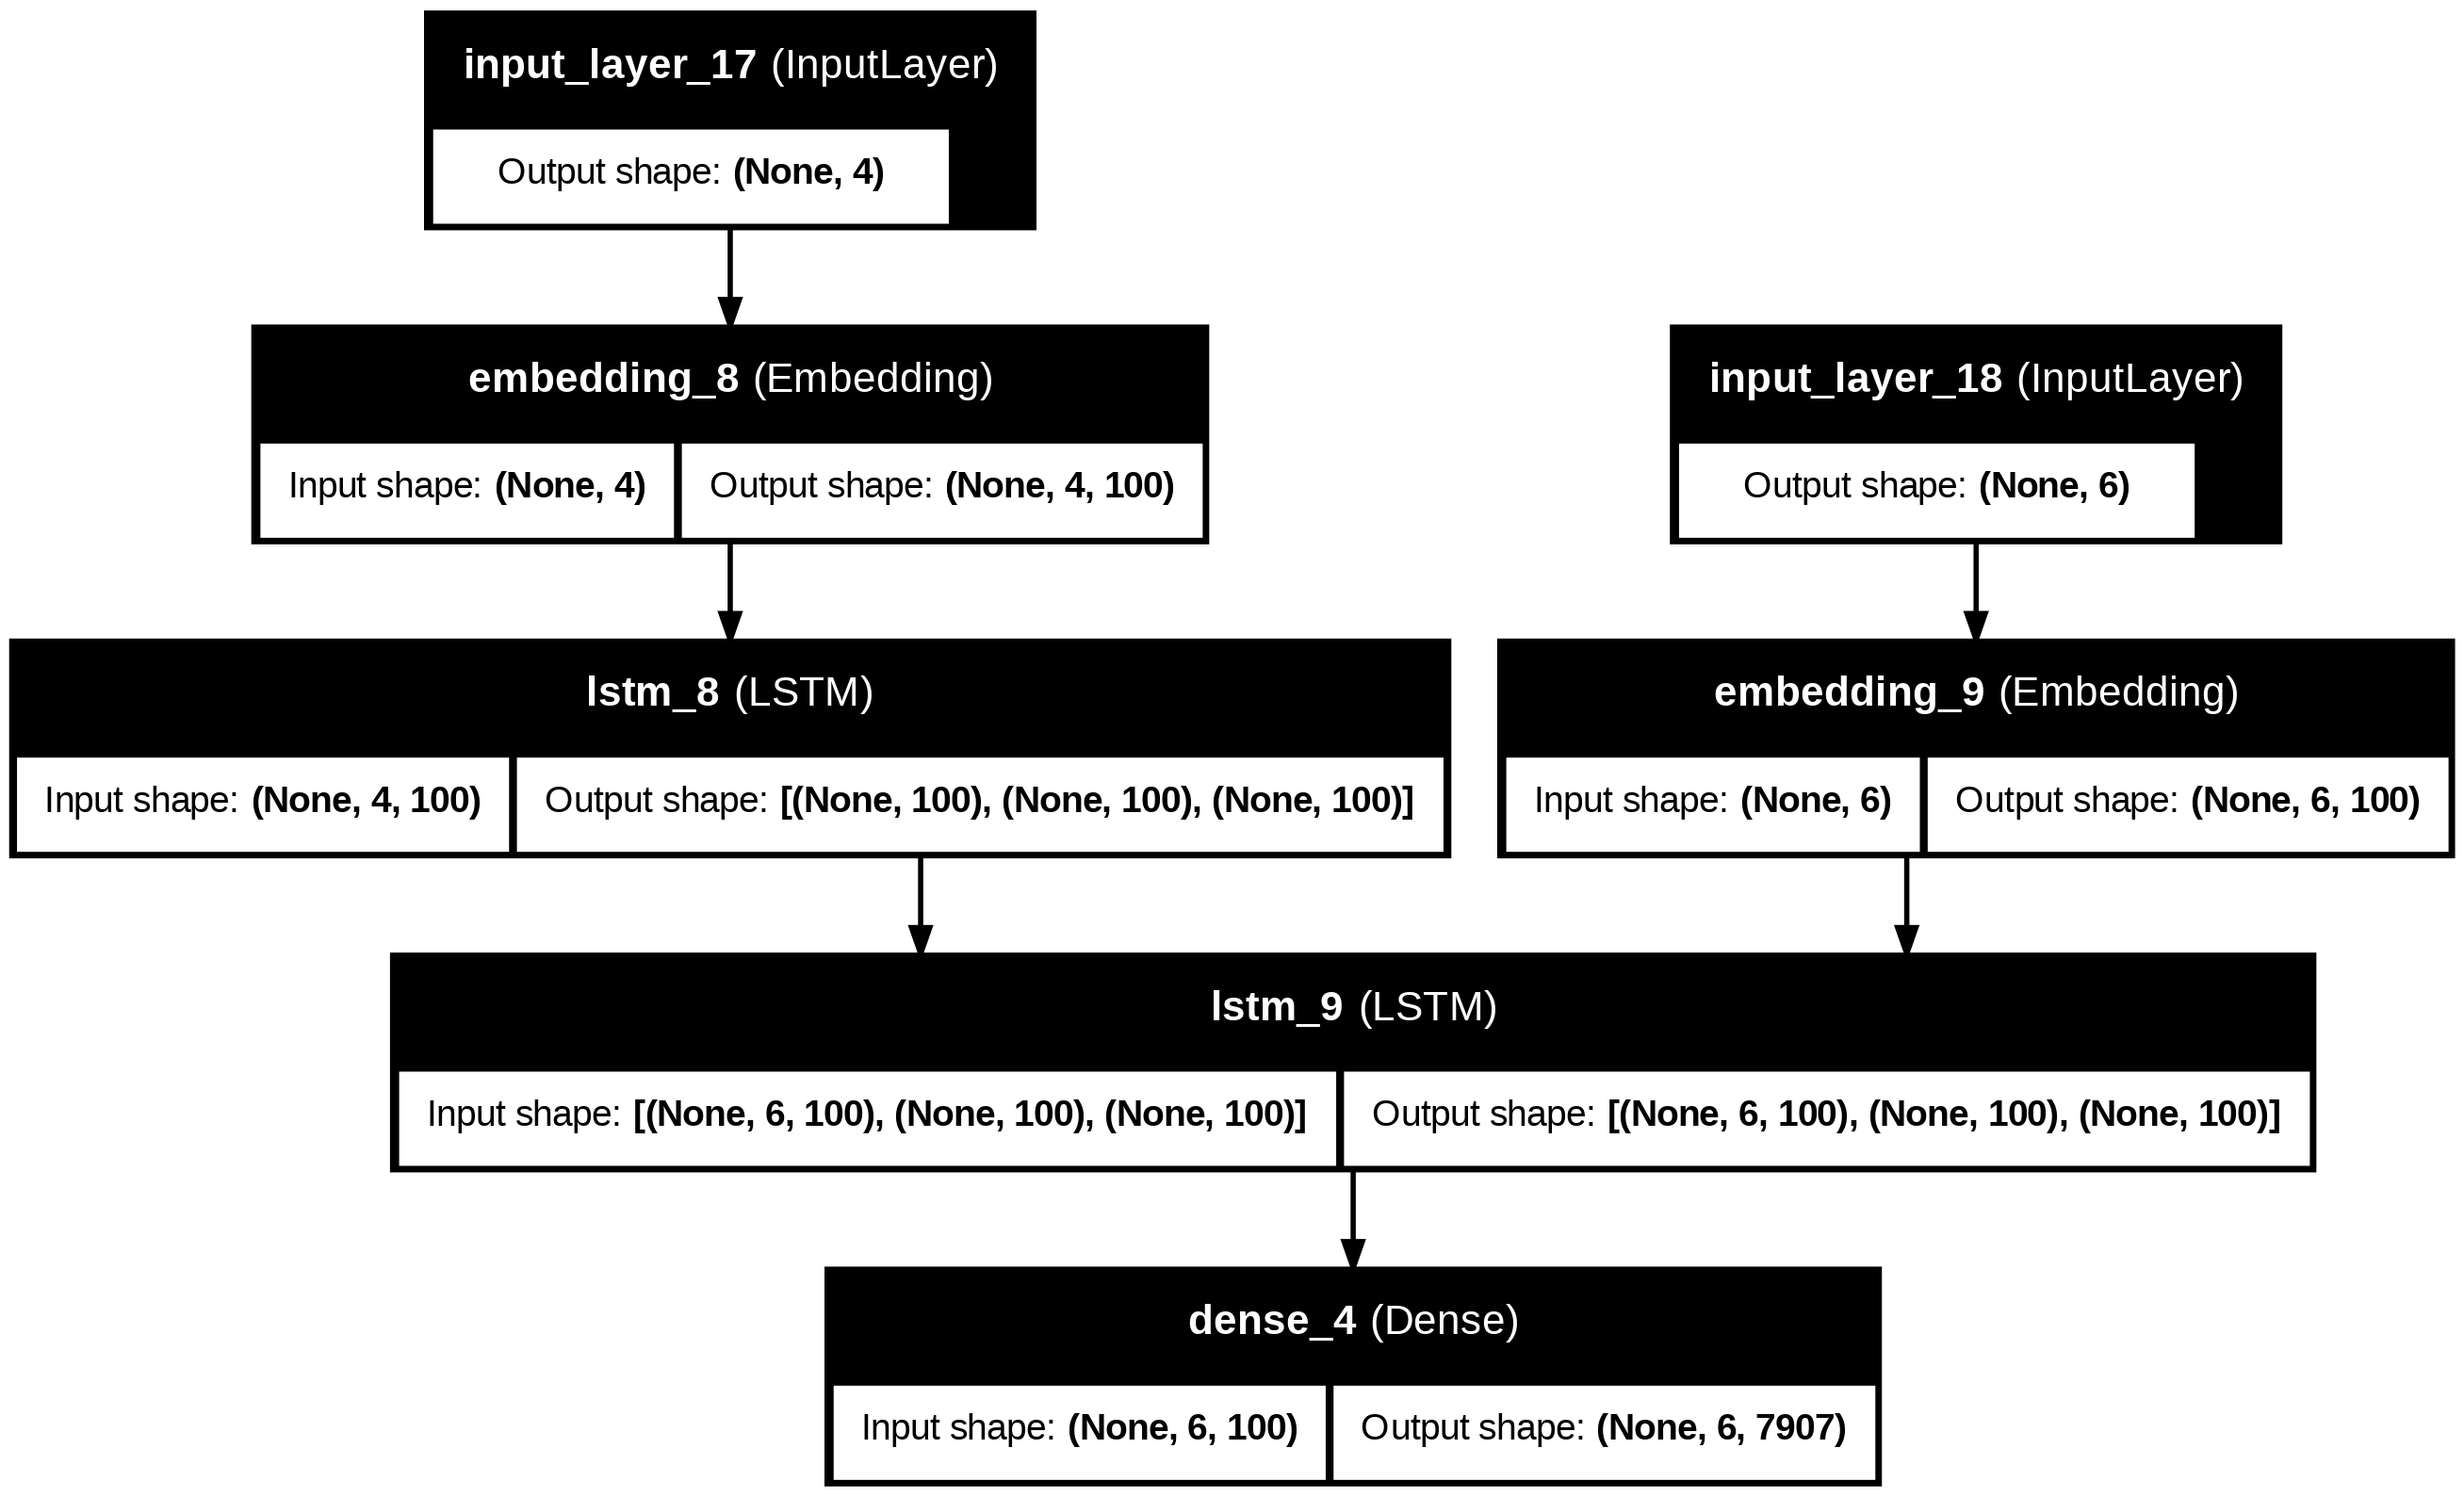

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_trn_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
trn = model.fit([encoder_input_sequences, decoder_input_sequences],
               decoder_outputs_onehot,
               batch_size=64, epochs=300, validation_split=0.1, verbose=False
               )


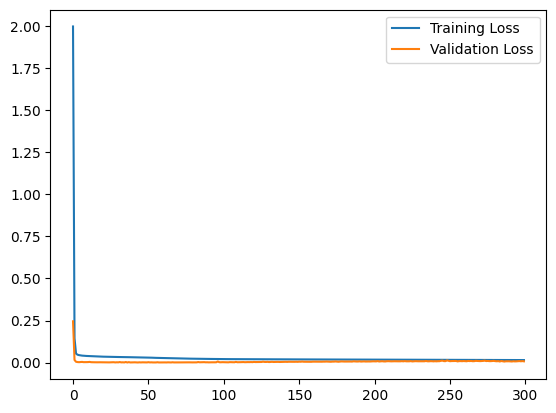

In [ ]:
import matplotlib.pyplot as plt

# Assuming `trn` is the history object from model.fit
plt.plot(trn.history['loss'], label='Training Loss')
plt.plot(trn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
import pickle

pickle.dump(model, open('model_trn.sav', 'wb'))

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)
print(encoder_model.summary())


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_8 (Embedding)              │ (None, 4, 100)              │         890,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ [(None, 100), (None, 100),  │          80,400 │
│                                      │ (None, 100)]                │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 970,900 (3.70 MB)

 Trainable params: 970,900 (3.70 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
pickle.dump(encoder_model, open('model_prd_enc.sav', 'wb'))


In [ ]:
decoder_input_h = Input(shape=(100,))
decoder_input_c = Input(shape=(100,))
decoder_input_states = [decoder_input_h, decoder_input_c]

decoder_input_word = Input(shape=(1,))
decoder_input_word_emb = decoder_embedding_layer(decoder_input_word)

decoder_outputs, h, c = decoder(decoder_input_word_emb, initial_state=decoder_input_states)
decoder_states = [h, c]

outputs = output_dense_layer(decoder_outputs)

In [ ]:
decoder_model = Model([decoder_input_word]+decoder_input_states, [outputs]+decoder_states)
print(decoder_model.summary())


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 1, 100)         │        790,700 │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_19            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_20            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ [(None, 1, 100),       │         80,400 │ embedding_9[1][0],     │
│                           │ (None, 100), (None,    │                │ input_layer_19[0][0],  │
│                           │ 100)]                  │                │ input_layer_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1, 7907)        │        798,607 │ lstm_9[1][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,669,707 (6.37 MB)

 Trainable params: 1,669,707 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
pickle.dump(decoder_model, open('model_prd_dec.sav', 'wb'))


In [ ]:
from numpy import argmax

index_to_word_input = {v:k for k,v in inputs_word2index.items()}
index_to_word_output = {v:k for k,v in outputs_word2index.items()}

def translate(input_seq):
    states = encoder_model.predict(input_seq)

    sos = outputs_word2index['<start>']
    eos = outputs_word2index['<end>']

    output_seq = zeros((1, 1))
    output_seq[0, 0] = sos

    output_sentence = []

    for _ in range(outputs_maxlen):
        output_tokens, h, c = decoder_model.predict([output_seq]+states)
        idx = argmax(output_tokens[0, 0, :])

        if idx == eos:
            break
        word = ''
        if idx > 0:
            word = index_to_word_output[idx]
            output_sentence.append(word)

        states = [h, c]
        output_seq[0, 0] = idx

    return ' '.join(output_sentence)

In [ ]:
from numpy import random

i = random.choice(len(df['English']))
input_seq = encoder_input_sequences[3:4]
translation = translate(input_seq)

print('Input:', df['English'][3])
print('Response:', translation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Input: of
Response: 


In [ ]:
word_frequencies = df['English'].value_counts()

unique_word_count = word_frequencies.nunique()

print(unique_word_count)



1


In [ ]:
index_of_sample = df[df['English'] == 'of'].index
print(index_of_sample)


Index([3], dtype='int64')


In [ ]:
print("Token index for 'of':", input_tokenizer.word_index.get('of'))


Token index for 'of': 62


In [ ]:
df.